<h1 align = 'center'> Jupyter ile Yapay Sinir Ağları  </h1>
<h2 align = 'center'> Kısım 3: Gradyen Azalım </h2>

<h4 align = 'center' > Welch Labs </h4>


Tahminlerimizi nasıl daha iyi hale getiririz, bunun için adım adım ilerleyelim.

In [76]:
%pylab inline
from partTwo import *

Populating the interactive namespace from numpy and matplotlib


In [77]:
NN = Neural_Network()
#Sinir Ağı Sınıfımızı NN değişkeni ile çağıralım. İçine nesne alan sınıfımızın
#kendisi de şu anda bir nesnedir.

In [78]:
yHat = NN.forward(X)
#İleri yayılım metodumuza gerçek X matris giriş değerlerini vererek çalıştıralım

In [79]:
yHat
#Tahmin değerlerimiz

array([[ 0.63514767],
       [ 0.65568389],
       [ 0.644363  ]])

In [80]:
y
#Gerçek y değerlerimiz

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

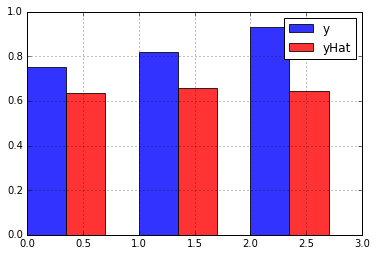

In [81]:
#yHat ile y arasındaki farkı bar chart ile gösterelim
bar([0,1,2], y, width = 0.35, alpha=0.8)
bar([0.35,1.35,2.35],yHat, width = 0.35, color='r', alpha=0.8)
grid(1)
legend(['y', 'yHat'])
#legend bir matplotlib fonksiyonudur. Geçici bir instance içinde değerlerimizi, 
#legend handler'ı içinde argüman olarak tutmamızı sağlar.

Tahminlerimiz oldukça kötü fakat, oldukça niteliği bize özünde, sonuçlarımızın gerçek sonuçlardan ne kadar kötü olduğunu anlatmaz. Bunun için hesabımızın sonunda bulduğumuz yHat değerinin gerçek sonuçtan ne kadar kötü olduğunu, maliyet fonksiyonu ile belirleriz. Maliyet fonksiyonu bize modelimizin ne kadar maliyetli olduğunu gösterir.

Bütünsel maliyet hesabı için her hata farkının karesini alır ve ikiye böleriz. Buna gradyen karesel maliyet fonsiyonu denir. Elimizde nicel bir maliyet sonucu olduğuna göre, artık görevimiz bu maliyeti minimize etmektir. Sinir ağlarında, bir ağı eğitmekten bahsettiklerinde, aslında hata fonksiyonunu minimize ettiklerini anlatırlar.

$$
J = \sum \frac{1}{2}(y-\hat{y})^2 \tag{5}
$$

Maliyet fonksiyonumuz sadece iki niteliğe bağlı, sinapslardaki ağırlıklarımıza ve örnek sonuçlarımıza. Örnek sonuçlarını değiştiremeyeceğimiz için, maliyeti düşürmek için ağırlıkları manipüle etmemiz gerekmekte.

Elimizde olan 9 ağırlık değeri için öyle değerler vardır ki, bizim maliyet fonksiyonumuzun sonucunu minimum çıkarabilir. Bunun için yöneylem ve optimizasyonda gördüğümüz gibi, yapmamız gereken ağırlık değerlerini değiştirerek denemektir.

Burada karşımıza Curse of Dimensionality denen problem çıkmaktadır. Bu problemi görebilmek için aşağıdaki örnek üzerinden ilerleyelim.

In [82]:
import time

weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros(1000)

startTime = time.clock()
for i in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    yHat = NN.forward(X)
    costs[i] = 0.5*sum((y-yHat)**2)
    
endTime = time.clock()

In [83]:
timeElapsed = endTime-startTime
timeElapsed

0.033715922940245946

1000 farklı değeri test etmek yaklaşık 0.04 saniye sürdü. Geniş bir varyasyonda değerlerimizi denediğimiz için bize en uygun gelen, yani hata maliyet fonksiyonunun sonucunu en düşük veren değeri seçebiliriz.

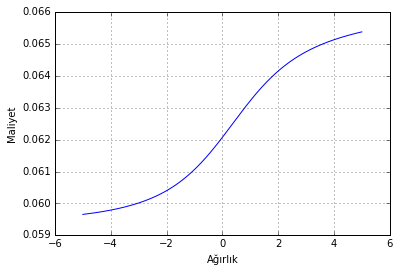

In [84]:
plot(weightsToTry, costs)
grid(1)
ylabel('Maliyet')
xlabel('Ağırlık')

Aslında burada sadece bir W1 için hesap yapıyoruz. İki ağırlık için deneme yapıyor olsak 1000x1000'den bir milyon farklı değeri denemek zorunda kalacağız. Hızlı bir bilgisayar için bile bu iş biraz zaman alıyor. Aşağıdaki örneğimizde iki ağırlığın minimum hata maliyet fonksiyon değeri için hesaplanmasını görüyoruz.

In [85]:
weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros((1000, 1000))

startTime = time.clock()
for i in range(1000):
    for j in range(1000):
        NN.W1[0,0] = weightsToTry[i]
        NN.W1[0,1] = weightsToTry[j]
        yHat = NN.forward(X)
        costs[i, j] = 0.5*sum((y-yHat)**2)
    
endTime = time.clock()

In [86]:
timeElapsed = endTime-startTime
timeElapsed

30.322623532681973

Biz ağırlıkları ekledikçe hesaplama süresi oldukça hızlı bir biçimde artıyor. Bu denemede hesaplama süresi yaklaşık 30 saniye sürdü. Fakat ağırlık değerleri arttıkça sonucu hesaplamak için çok daha uzun süre gerekeceğini ölçebiliriz.

In [87]:
0.04*(1000**(9-1))/(3600*24*365)

1268391679350583.5

Basit bir sinir ağında bile 9 ağırlık için hesap yaptığımızda, hesaplama süresi ömrümüzden uzun süreceğini görebiliyoruz. Kaba kuvvet optimizasyonu bu noktada etkili olmayacaktır. 

1 boyutlu hesaplamamıza dönelim, spesifik bir w ağırlığı için maliyet fonksiyonumuzun ne sonuca varacağını hesaplayalım. w=1.1 değeri için Maliyet 
j=2.8 çıkmakta.

w değerini arttırdığımızda mı yoksa azalttığımızda mı daha küçük bir j değeri elde ederiz? Eğer bunu öngörebilirsek, doğrudan ağırlık değerini azaltarak ya da arttırarak sonuca daha çabuk varabiliriz. Bu yönteme numerik tahmin denmekte.
Fakat bizim problemimiz için daha iyi bir tahmin yolu bulunmakta.

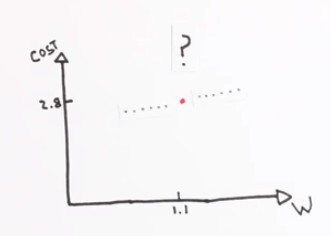

In [88]:
from IPython.display import Image
i = Image(filename='images/numeriktahmin.png')
i

$$
z^{(2)} = XW^{(1)} \tag{1}\\
$$
$$
a^{(2)} = f(z^{(2)}) \tag{2}\\
$$
$$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$
$$
\hat{y} = f(z^{(3)}) \tag{4}\\
$$
$$
J = \sum \frac{1}{2}(y-\hat{y})^2 \tag{5}\\
$$

Elimizdeki 5 denklemi aslında tek bir denklem olarak düşünebiliriz.

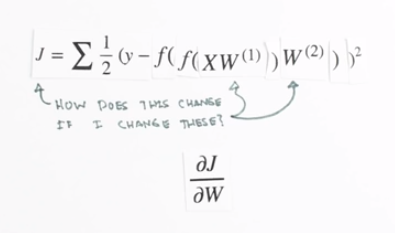

In [89]:
from IPython.display import Image
i = Image(filename='images/derivative.png')
i

We can derive an expression for dJdW, that will give us the rate of change of J with respect to W, for any value of W! If dJdW is positive, then the cost function is going uphill. If dJdW is negative the cost function is going downhill. 

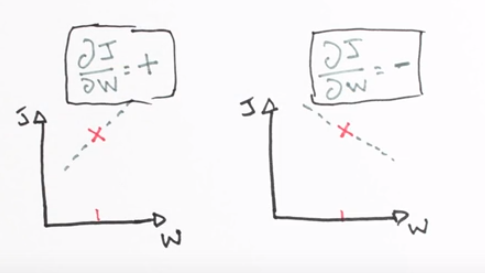

In [90]:
from IPython.display import Image
i = Image(filename='images/jw.png')
i

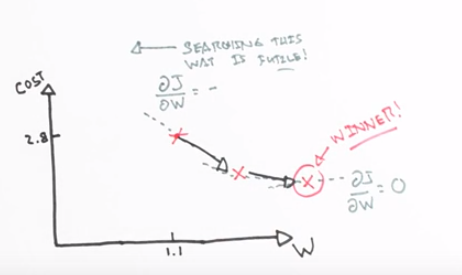

In [91]:
from IPython.display import Image
i = Image(filename='images/GradyenAzalim.png')
i

Bu metoda gradyen azalım denir. Tek bir boyutta etkileyici görünmese de, boyutlar arttığında bize değişimin hangi yönde olması gerektiğine dair hızlı çıkarımlar yapmamıza olanak verir.

Karşımıza çıkacak olan sorun ise, herhangi bir yerel minimuma ulaştığımızda, en düşük hata maliyetini bulduğumuzu sanabiliriz. Bu da bizi global minimumdan uzaklaştırır. Bu sonuç da elde ettiğimiz hata maliyet grafiğimizin konveks olmaması demektir. y=x^2 gibi fonksiyonlar tek global minimum değerine sahip fonksiyonlardır. Daha üst boyutlu konveks fonksiyonlar da bulunmaktadır. 

Elimizdeki verileri nasıl kullandığımıza göre maliyet fonksiyonumuzun konveks olup olmamasının önemi kalmadan hala iyi sonuçlar elde edebiliriz. Bunun için tek bir seferde hepsini denemek yerine her bir örneğimiz için tek tek maliyet fonksiyonlarını hesaplamamız gerekir. Bu yönteme Stokastik Gradyen Azalım denir. 